In [1]:
import pandas as pd
import numpy as np
import uci_dataset as database

import raimitigations.dataprocessing as dp

# 1 - Understanding the Data

In [2]:
df = database.load_wilt()
label_col = "class"
df

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193
...,...,...,...,...,...,...
495,n,123.554348,202.826087,106.391304,364.565217,17.314068
496,n,121.549028,276.220000,175.593333,402.620000,13.394574
497,n,119.076687,247.951220,113.365854,808.024390,24.830059
498,n,107.944444,197.000000,90.000000,451.000000,8.214887


In [3]:
df[label_col] = df[label_col].replace({"w": 1, "n": 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4839 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4839 non-null   int64  
 1   GLCM_pan    4839 non-null   float64
 2   Mean_Green  4839 non-null   float64
 3   Mean_Red    4839 non-null   float64
 4   Mean_NIR    4839 non-null   float64
 5   SD_pan      4839 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 264.6 KB


In [4]:
cor_feat = dp.CorrelatedFeatures(
					method_num_num=["spearman", "pearson", "kendall"],				# Used for Numerical x Numerical correlations
					num_corr_th=0.9,												# Used for Numerical x Numerical correlations
					num_pvalue_th=0.05,												# Used for Numerical x Numerical correlations
					method_num_cat="model",											# Used for Numerical x Categorical correlations
					model_metrics=["f1", "auc"],									# Used for Numerical x Categorical correlations
					metric_th=0.9,													# Used for Numerical x Categorical correlations
					cat_corr_th=0.9,												# Used for Categorical x Categorical correlations
					cat_pvalue_th=0.01,												# Used for Categorical x Categorical correlations
					json_summary="./corr_json/c2_summary.json",
					json_corr="./corr_json/c2_corr.json",
					json_uncorr="./corr_json/c2_uncorr.json"
				)
cor_feat.fit(df=df, label_col=label_col)

No correlations detected. Nothing to be done here.


Remember to look through the JSON files generated in the previous cell

# 2 - Baseline Models

In [5]:
train_x, test_x, train_y, test_y = dp.split_data(df, label_col, test_size=0.25)

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------
TEST
------------
[[1076   69]
 [   9   56]]


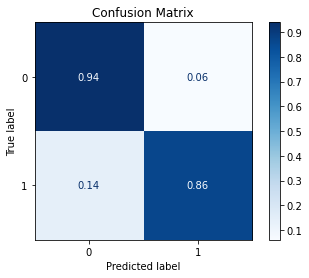

Acuracy: 93.55%
Precision:  0.719852534562212
Recall:  0.9006382264024186
F1 =  0.777248052867595
ROC AUC =  0.94718844474303
best_th = 0.12699560821056366


In [6]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="xgb", train_result=False, plot_pr=False)

------------
TEST
------------
[[1105   40]
 [  10   55]]


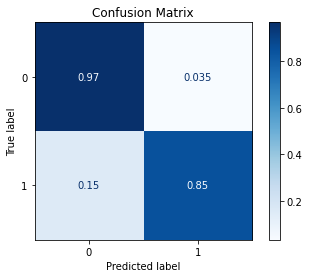

Acuracy: 95.87%
Precision:  0.7849893792777909
Recall:  0.9056096741686261
F1 =  0.8326880530973452
ROC AUC =  0.916022841787034
best_th = 0.2


In [7]:
model = dp.train_model_plot_results(train_x, train_y, test_x, test_y, model_name="knn", train_result=False, plot_pr=False)

# 3 - Data Transformation

## DataMinMaxScaler

------------
TEST
------------
[[1015  130]
 [  22   43]]


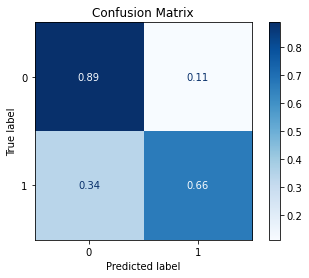

Acuracy: 87.44%
Precision:  0.6136699349501954
Recall:  0.7740006718172656
F1 =  0.6458418381101295
ROC AUC =  0.7831709774941216
best_th = 0.2


In [8]:
scaler = dp.DataMinMaxScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## DataNormalizer

No columns specified for imputation. These columns have been automatically identified:
[]
------------
TEST
------------
[[1080   65]
 [   4   61]]


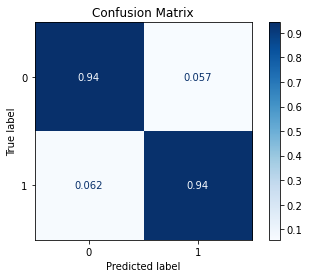

Acuracy: 94.30%
Precision:  0.7402184736133076
Recall:  0.9408464897547867
F1 =  0.8038939350165242
ROC AUC =  0.9593416190796104
best_th = 0.2


In [9]:
scaler = dp.DataNormalizer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## DataStandardScaler

------------
TEST
------------
[[1080   65]
 [  12   53]]


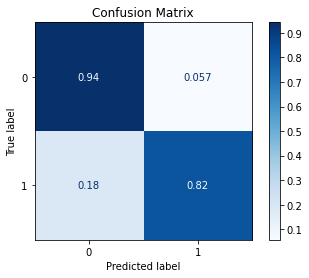

Acuracy: 93.64%
Precision:  0.7190817656919353
Recall:  0.8793080282163251
F1 =  0.7724069364952575
ROC AUC =  0.8901511588847832
best_th = 0.2


In [10]:
scaler = dp.DataStandardScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## DataQuantileTransformer

------------
TEST
------------
[[1103   42]
 [   4   61]]


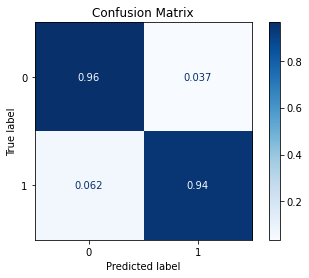

Acuracy: 96.20%
Precision:  0.7943098201208549
Recall:  0.9508901578770574
F1 =  0.8528820942231246
ROC AUC =  0.960893516963386
best_th = 0.2


In [11]:
scaler = dp.DataQuantileTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

As we can see, this transformation had some impact in the results (depends on the seed used) when we use KNN. Let's check how this data transformation impacts the XGBoost model:

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


------------
TEST
------------
[[1076   69]
 [   9   56]]


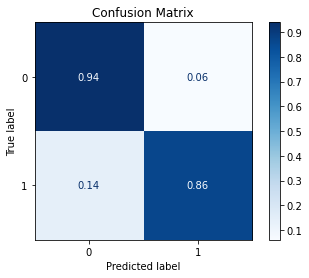

Acuracy: 93.55%
Precision:  0.719852534562212
Recall:  0.9006382264024186
F1 =  0.777248052867595
ROC AUC =  0.9457910648303662
best_th = 0.12699560821056366


In [12]:
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="xgb", train_result=False, plot_pr=False)

As depicted above, the results for the XGBoost remains the same as before. This shows us that data transformations are more impactful in certain models and less meaningful in others.

## DataRobustScaler

------------
TEST
------------
[[1109   36]
 [   7   58]]


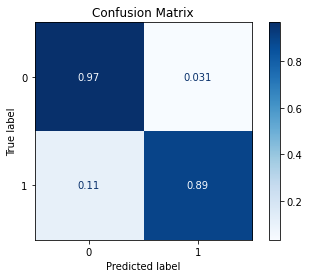

Acuracy: 96.45%
Precision:  0.8053744375810264
Recall:  0.930433322136379
F1 =  0.8552708074292279
ROC AUC =  0.9397715821296606
best_th = 0.2


In [13]:
scaler = dp.DataRobustScaler()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

## DataPowerTransformer

------------
TEST
------------
[[1111   34]
 [   6   59]]


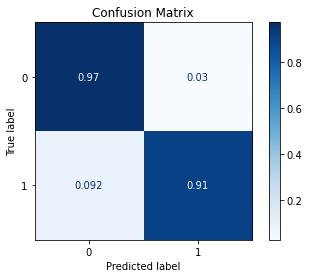

Acuracy: 96.69%
Precision:  0.8145185356321175
Recall:  0.9389989922741014
F1 =  0.8645759885393234
ROC AUC =  0.9472489082969431
best_th = 0.2


In [14]:
scaler = dp.DataPowerTransformer()
scaler.fit(train_x)
train_x_scl = scaler.transform(train_x)
test_x_scl = scaler.transform(test_x)
model = dp.train_model_plot_results(train_x_scl, train_y, test_x_scl, test_y, model_name="knn", train_result=False, plot_pr=False)

# 4 - Feature Selection

In [15]:
feat_sel = dp.SeqFeatSelection(n_jobs=4, forward=False)
feat_sel.fit(X=train_x_scl, y=train_y)
train_x_sel = feat_sel.transform(train_x_scl)
test_x_sel = feat_sel.transform(test_x_scl)

No columns specified for imputation. These columns have been automatically identified:
[]
No columns specified for encoding. These columns have been automatically identfied as the following:
[]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.7s finished

[2022-03-16 10:07:03] Features: 4/1 -- score: 0.8816067968906397[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-03-16 10:07:03] Features: 3/1 -- score: 0.8549936296115336[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished

[2022-03-16 10:07:03] Features: 2/1 -- score: 0.8616183246641761[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.5s finished

[2022-03-16 10:07:04] Features: 1/1 -- score: 0.5828580172198672

In [16]:
feat_sel.get_selected_features()

['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR']

------------
TEST
------------
[[1114   31]
 [   4   61]]


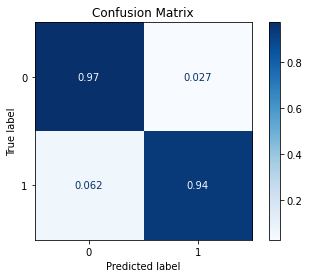

Acuracy: 97.11%
Precision:  0.8297328303647817
Recall:  0.955693651326839
F1 =  0.8808019341891578
ROC AUC =  0.9635807860262008
best_th = 0.2


In [17]:
model = dp.train_model_plot_results(train_x_sel, train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

# 5 - Synthetic Data

## imblearn Library

In [18]:
train_y.value_counts()

0    3433
1     196
Name: class, dtype: int64

In [19]:
rebalance = dp.Rebalance(
				X=train_x_sel,
				y=train_y,
				strategy_over={0:3433, 1:400},
				over_sampler=True,
				under_sampler=False
			)
train_x_res, train_y_res = rebalance.fit_resample()
train_y_res.value_counts()

No columns specified for imputation. These columns have been automatically identified:
[]

SMOTE.

Running oversampling...
...finished


0    3433
1     400
Name: class, dtype: int64

------------
TEST
------------
[[1111   34]
 [   3   62]]


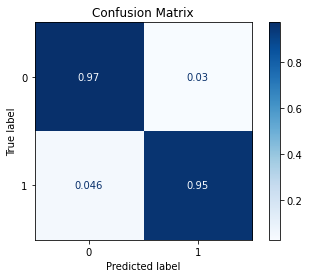

Acuracy: 96.94%
Precision:  0.8215701675643328
Recall:  0.9620759153510245
F1 =  0.8769037033371001
ROC AUC =  0.9707625125965738
best_th = 0.2


In [20]:
model = dp.train_model_plot_results(train_x_res, train_y_res, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

## Creating Artificial Data using Deep Learning

### CTGAN

Let's use the dataset with the original categorical variables, since CTGAN is capable of dealing with categorical variables internally. We will start by re-encoding the ordinal variables. We then proceed to split the dataset before using the CTGAN. This guarantees that we don't contaminate our test set.

In [21]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="ctgan",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

syn_train_y.value_counts()

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate 

0    3433
1     396
Name: class, dtype: int64

------------
TEST
------------
[[1046   99]
 [   1   64]]


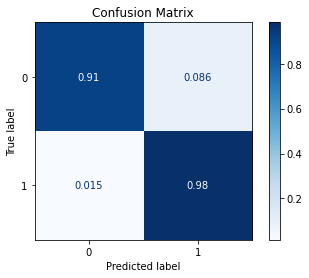

Acuracy: 91.74%
Precision:  0.6958414634860923
Recall:  0.9490762512596573
F1 =  0.7578915354078628
ROC AUC =  0.9839234128317098
best_th = 0.2


In [22]:
model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

Let's try creating more artificial instances and check how this impacts the model's performance.

------------
TEST
------------
[[1087   58]
 [   6   59]]


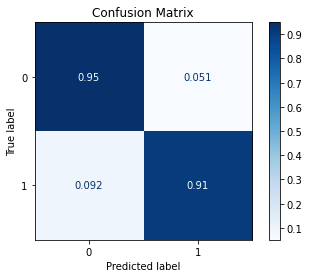

Acuracy: 94.71%
Precision:  0.7493920128869809
Recall:  0.9285186429291232
F1 =  0.8098773433894078
ROC AUC =  0.978018139066174
best_th = 0.6


In [23]:
conditions = {label_col:1}	# create more of the undersampled class
syn_train_x, syn_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=2000, conditions=conditions)

model = dp.train_model_plot_results(syn_train_x, syn_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)

### TVAE

/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/home/matheus/miniconda3/envs/resp/lib/python3.7/site-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate 

------------
TEST
------------
[[1051   94]
 [   2   63]]


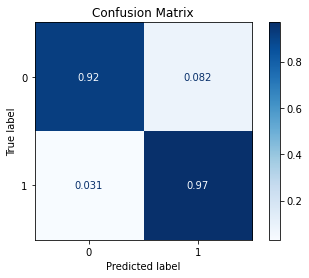

Acuracy: 92.07%
Precision:  0.699687275058825
Recall:  0.9435673496808867
F1 =  0.7619457492068957
ROC AUC =  0.9733087000335909
best_th = 0.2


In [24]:
synth = dp.Synthesizer(
				X=train_x_sel,
				y=train_y,
				epochs=400,
				model="tvae",
				load_existing=True
			)
synth.fit()

conditions = {label_col:1}	# create more of the undersampled class
syn2_train_x, syn2_train_y = synth.transform(X=train_x_sel, y=train_y, n_samples=200, conditions=conditions)

model = dp.train_model_plot_results(syn2_train_x, syn2_train_y, test_x_sel, test_y, model_name="knn", train_result=False, plot_pr=False)